# Wine Prediction Project

The objective of this project is to predict the quality of a wine from its data, for this to be done it is necessary to perform a data cleaning, data pre-processing and application of machine learning.

The data for this project were taken from the website https://www.kaggle.com/datasets

##### Main Steps:
######  Data Reading & Importing Libs
######  Building a Machine Learning model to predict a quality of a wine.
######  Fitting Best model and Prepare to Deploy
######  App Widget.



### 1. Data Reading & Importing Libs

#### 1.1 Data Manipulation & Data Vis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import missingno as msno

#### 1.2 Pre-processing, Machine Learning, Metrics

In [3]:
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [4]:
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf

#### 1.3 Reading Data

In [5]:
df = pd.read_csv('winequalityN.csv')

In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


#### 1.4 Searching for Missing Values

<AxesSubplot:>

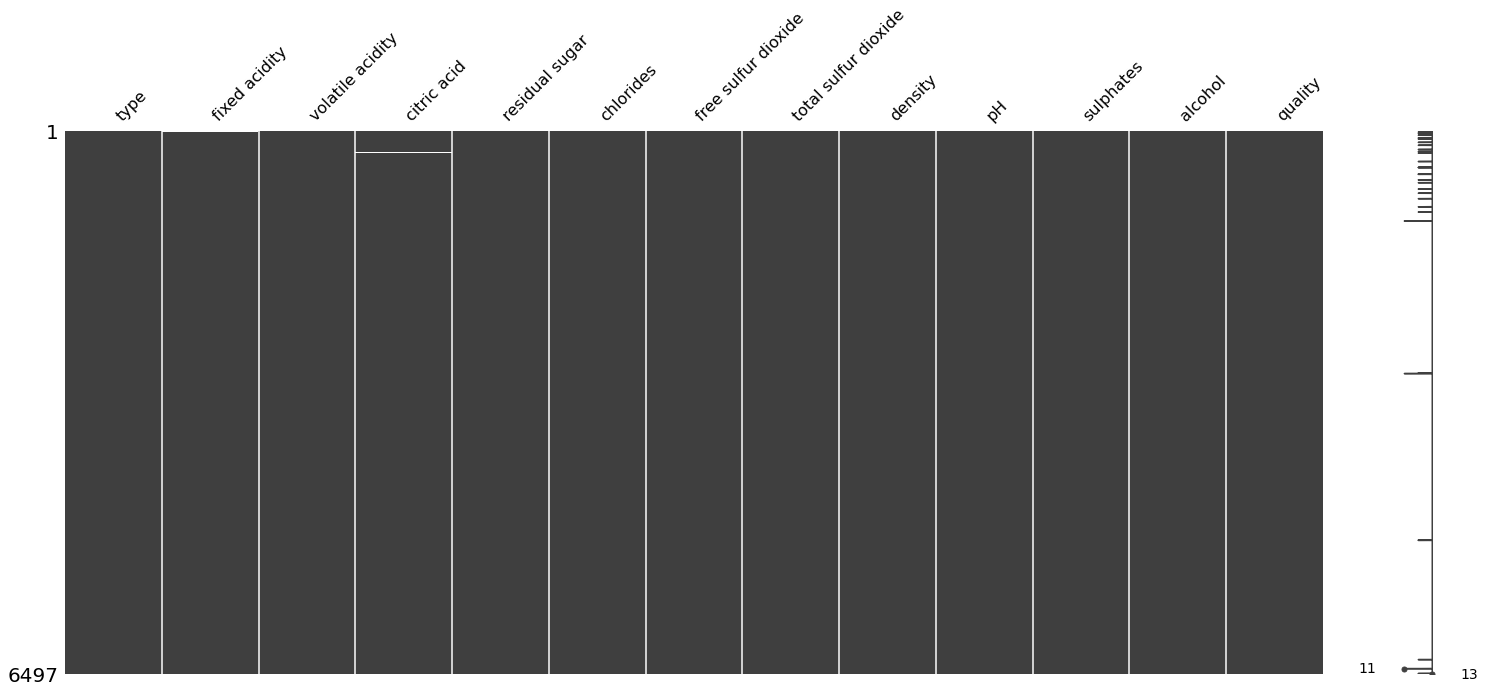

In [7]:
msno.matrix(df)

In [8]:
print("Null Values: ", df.isna().sum().sum())

Null Values:  38


#### 1.5 Remapping target values

In [9]:
df.quality.value_counts()

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [10]:
remap = {3:0, 4:0, 5:0, 6:1, 7:1, 8:1, 9:1}

In [11]:
df.quality = df.quality.map(remap)

In [12]:
df.quality.value_counts()

1    4113
0    2384
Name: quality, dtype: int64

#### 1.6 Encoding Categorical to Numerical

In [13]:
lb = LabelEncoder()

In [14]:
df.type = lb.fit_transform(df.type)
df.quality = lb.fit_transform(df.quality)

#### 1.7 Searching for Patterns

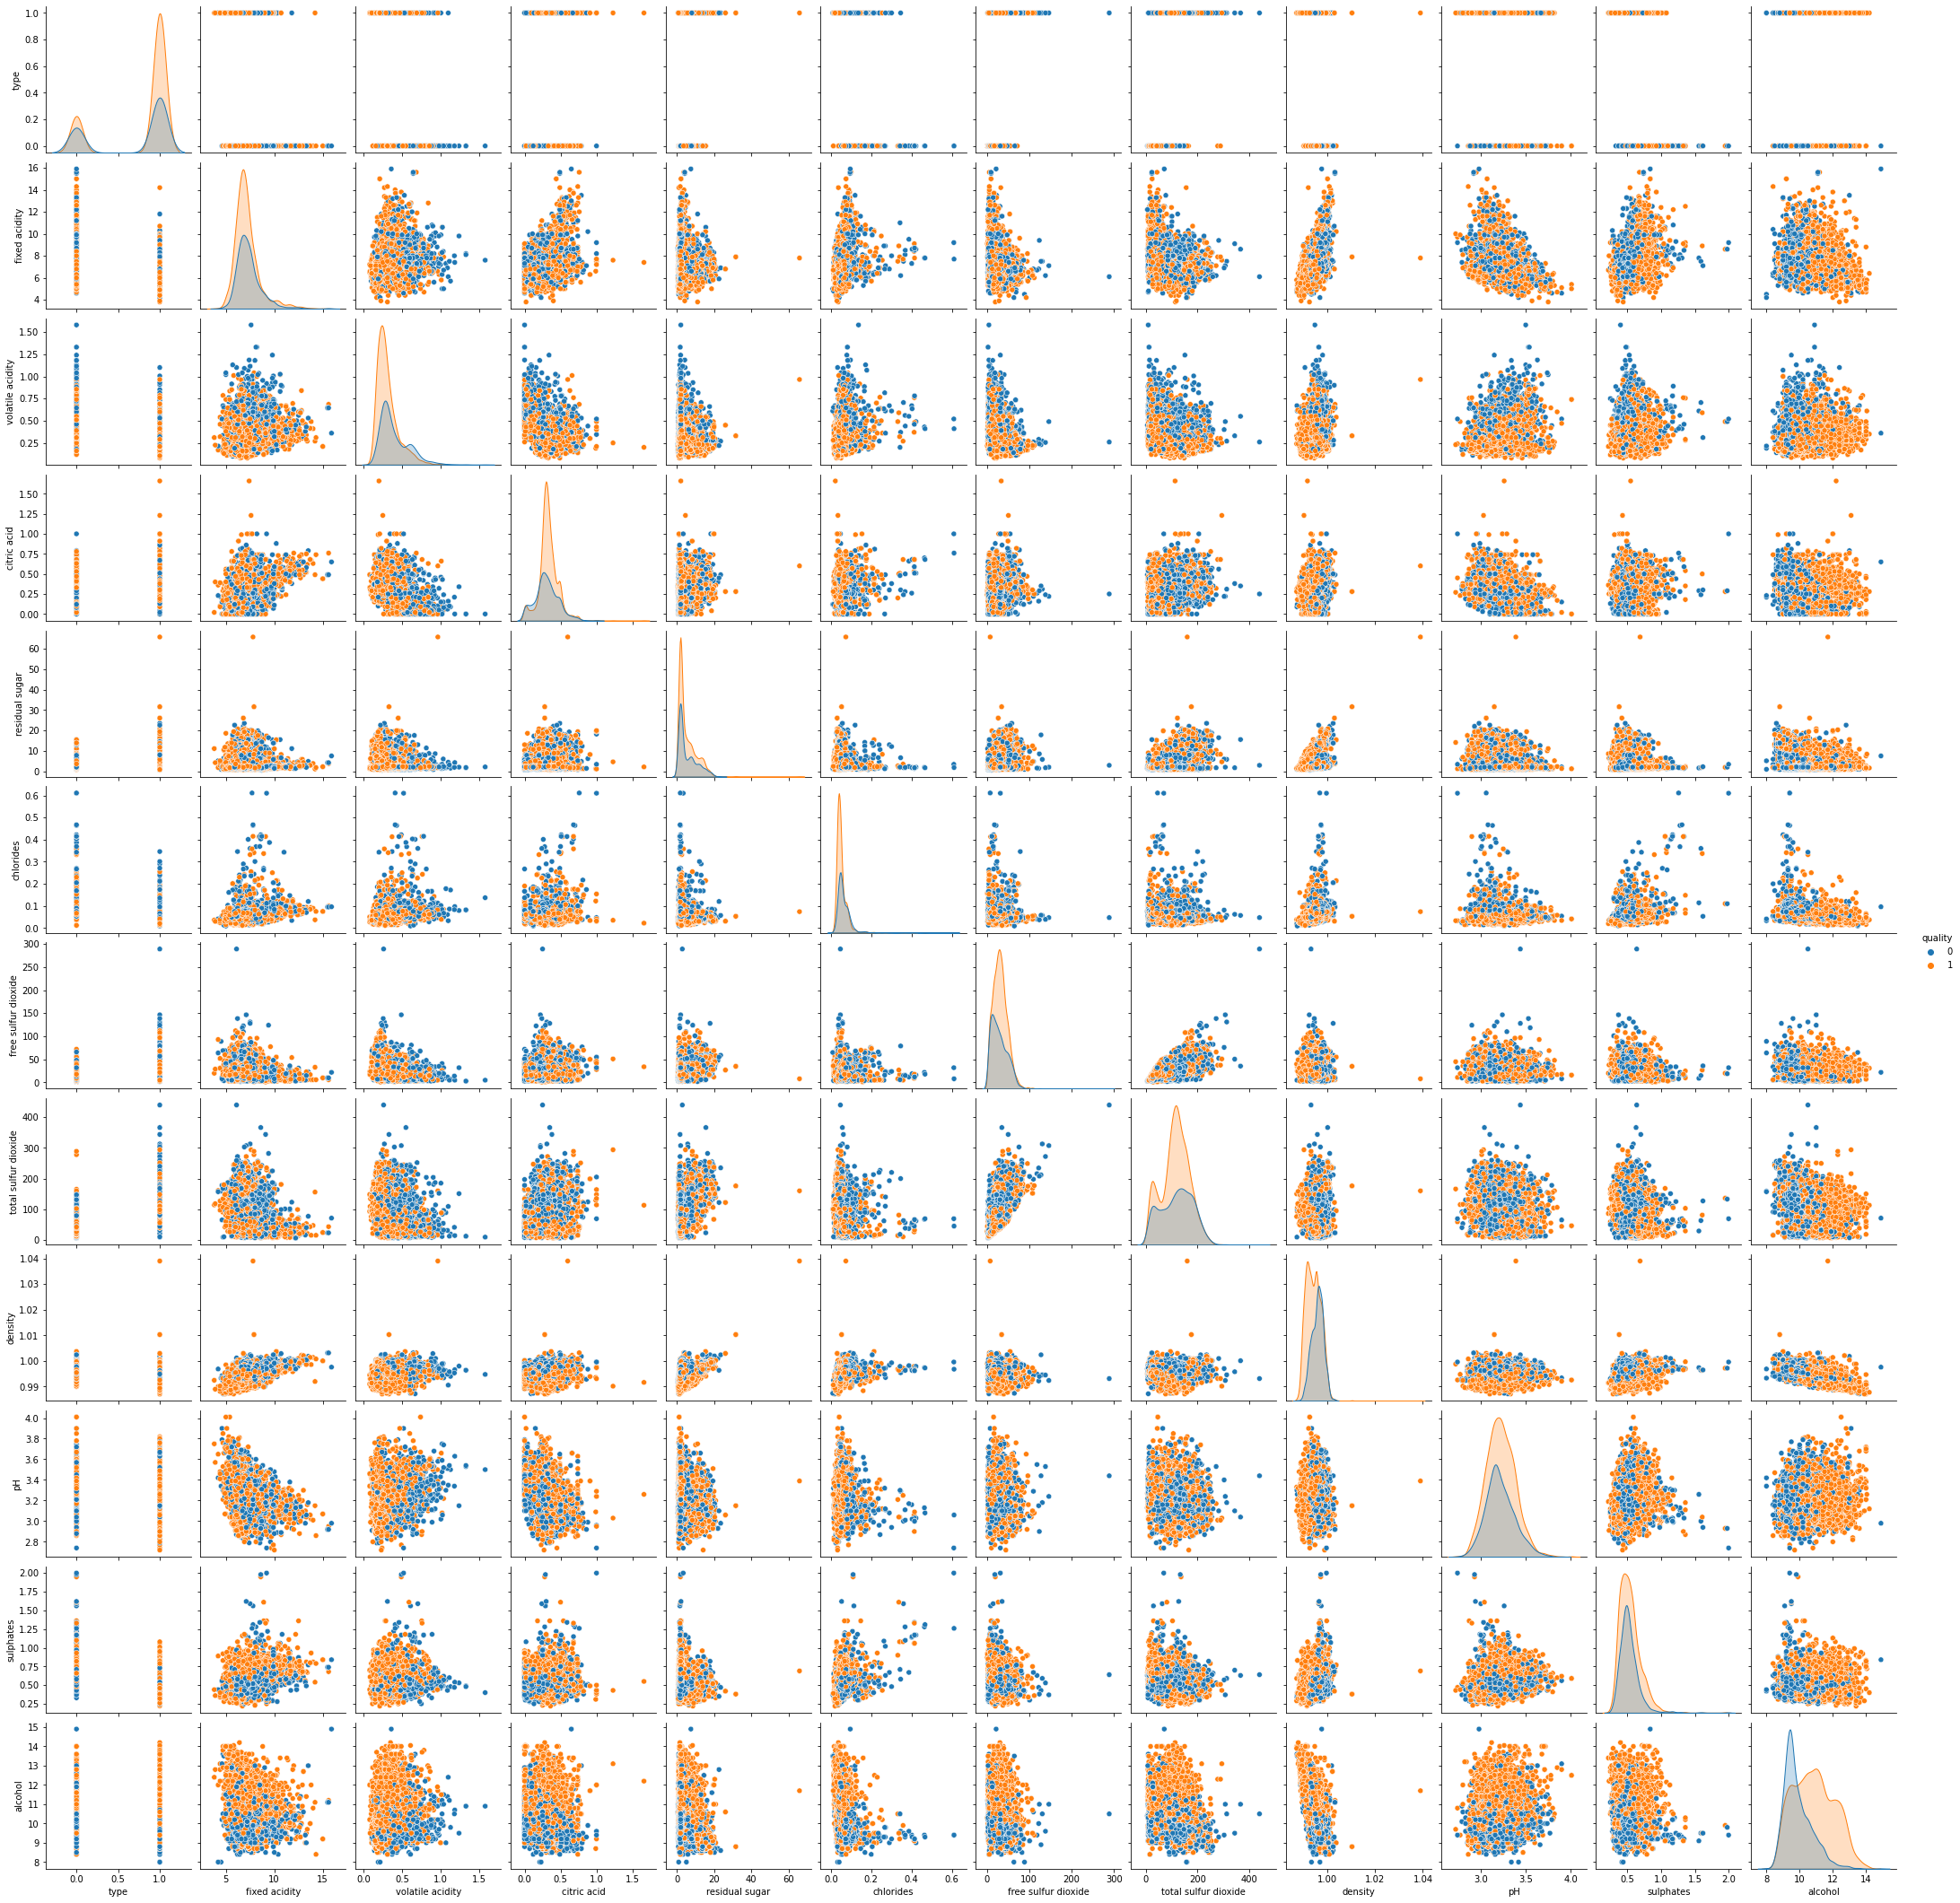

In [15]:
sns.pairplot(df, hue='quality')

### 2. Building a Machine Learning model to predict a quality of a wine.

#### 2.1 Pipeline

In [15]:
pipe = Pipeline(
    [
        ('imputer', SimpleImputer()),
        ('rf', RandomForestClassifier(criterion='entropy', n_jobs=8))
    ]
)

#### 2.2 Splitting in to train and test datasets

In [16]:
X = df.drop(columns='quality')
y = df.quality

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### 2.3 Pipeline fit for X_train and y_train and predict for X_test

In [18]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('rf', RandomForestClassifier(criterion='entropy', n_jobs=8))])

In [19]:
predict = pipe.predict(X_test)

#### 2.4 Metrics for Random Forest Classifier:

In [20]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       709
           1       0.85      0.88      0.86      1241

    accuracy                           0.82      1950
   macro avg       0.81      0.80      0.81      1950
weighted avg       0.82      0.82      0.82      1950



#### 2.5 Cross validation function

In [21]:
def model_rf(model, X_train, y_train, X_test, y_test):
    model.fit(X_train,y_train)
    print(f"Treino: {model.score(X_train,y_train)} \t Teste: {model.score(X_test, y_test)} \n")
    
    kfold = KFold(n_splits=5, random_state=42, shuffle=True)
    predict = cross_val_predict(model, X, y, cv=kfold) # cross validate on entire dataset.
    print(f"Cross Val: {cross_val_score(model, X, y, cv=kfold)} \n")
    print(classification_report(y, predict))

In [22]:
model_rf(pipe, X_train, y_train, X_test, y_test)

Treino: 1.0 	 Teste: 0.8246153846153846 

Cross Val: [0.83615385 0.81846154 0.84680523 0.8321786  0.81909161] 

              precision    recall  f1-score   support

           0       0.80      0.74      0.77      2384
           1       0.86      0.89      0.87      4113

    accuracy                           0.84      6497
   macro avg       0.83      0.82      0.82      6497
weighted avg       0.84      0.84      0.84      6497



#### 2.6 Random Search Hyper-parameter Tuning for Random Forest Classifier

##### 2.6.1 Imputing Values

In [18]:
simp = SimpleImputer(missing_values=np.nan)

In [19]:
df = pd.DataFrame(simp.fit_transform(df), columns=df.columns)

##### 2.6.2 Splitting in to train and test

In [20]:
X = df.drop(columns='quality')
y = df.quality

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

##### 2.6.3 Parameters for random searching

In [29]:
param_grid = {
 'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'criterion':['gini','entropy'],
 'class_weight':[None,'balanced','balanced_subsample']

}

##### 2.6.4 Fitting for 300 iterations (3 folds)

In [30]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = param_grid, n_iter = 100, cv = 3, verbose=5, random_state=42, n_jobs = -1)

In [31]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed: 14.1min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.4min finished


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 400, 600,
                                                         800, 1000, 1200, 1400,
                                                         1600, 1800, 

##### 2.6.5 Seeing best estimator and score

In [32]:
rf_random.best_estimator_

RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=400)

In [33]:
rf_random.best_score_

0.8085446348493915

##### 2.6.6 Predicting with new model

In [34]:
predict = rf_random.predict(X_test)

In [35]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

         0.0       0.79      0.78      0.79       468
         1.0       0.88      0.89      0.88       832

    accuracy                           0.85      1300
   macro avg       0.83      0.83      0.83      1300
weighted avg       0.85      0.85      0.85      1300



A little increase in precision and f1-score, great! lets see in cross validation

##### 2.6.7 New model Confusion Matrix

In [36]:
print(confusion_matrix(y_test, predict))

[[364 104]
 [ 95 737]]


##### 2.6.8 Cross Validating new model

In [38]:
model_rf(rf_random.best_estimator_, X_train, y_train, X_test, y_test)

Treino: 1.0 
 Teste: 0.8492307692307692
Cross Val: [0.84923077 0.82076923 0.84834488 0.83448807 0.82371055] 

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76      2384
         1.0       0.85      0.89      0.87      4113

    accuracy                           0.83      6497
   macro avg       0.83      0.81      0.82      6497
weighted avg       0.83      0.83      0.83      6497



Did not change as we expected

#### 2.7 Deep Learning model test

##### 2.7.1 MinMax Scaling values to optimize inputs in the neural network

In [132]:
Scaler = MinMaxScaler()

In [133]:
X_scaled = Scaler.fit_transform(X)

##### 2.7.2 Deep Neural Network Function

In [178]:
def create_larger():
    model = Sequential([
    Dense(32, activation='relu', input_dim=12),
    Dropout(0.20),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='sigmoid'),
    Dense(1, activation='sigmoid')
])

    model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

    return model

In [179]:
model = create_larger()

##### 2.7.3 Splitting in to train and test

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

##### 2.7.4 Running model

In [181]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32,
                    epochs=100,
                    shuffle=True,
                    validation_split=0.2,
                    verbose=2,
                    workers=8, 
                    use_multiprocessing=True)

Epoch 1/100
130/130 - 1s - loss: 0.6045 - accuracy: 0.6611 - precision: 0.6944 - recall: 0.8200 - val_loss: 0.5397 - val_accuracy: 0.7404 - val_precision: 0.7678 - val_recall: 0.8609 - 1s/epoch - 11ms/step
Epoch 2/100
130/130 - 0s - loss: 0.5652 - accuracy: 0.7094 - precision: 0.7526 - recall: 0.7988 - val_loss: 0.5527 - val_accuracy: 0.7135 - val_precision: 0.8236 - val_recall: 0.7115 - 233ms/epoch - 2ms/step
Epoch 3/100
130/130 - 0s - loss: 0.5620 - accuracy: 0.7108 - precision: 0.7522 - recall: 0.8031 - val_loss: 0.5293 - val_accuracy: 0.7394 - val_precision: 0.7560 - val_recall: 0.8846 - 239ms/epoch - 2ms/step
Epoch 4/100
130/130 - 0s - loss: 0.5523 - accuracy: 0.7193 - precision: 0.7575 - recall: 0.8119 - val_loss: 0.5177 - val_accuracy: 0.7452 - val_precision: 0.7915 - val_recall: 0.8254 - 244ms/epoch - 2ms/step
Epoch 5/100
130/130 - 0s - loss: 0.5476 - accuracy: 0.7284 - precision: 0.7641 - recall: 0.8196 - val_loss: 0.5516 - val_accuracy: 0.6904 - val_precision: 0.8540 - val_re

##### 2.7.5 Predicting and Metrics

In [182]:
pred = model.predict(X_test)

In [183]:
pred = [
    1 if prob > 0.5 else 0 for prob in np.ravel(pred)
]

In [184]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.67      0.64      0.65       468
         1.0       0.80      0.82      0.81       832

    accuracy                           0.75      1300
   macro avg       0.73      0.73      0.73      1300
weighted avg       0.75      0.75      0.75      1300



The results were no better than the random forest classifier.

##### 2.7.6 Accuracy and Loss Curves

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

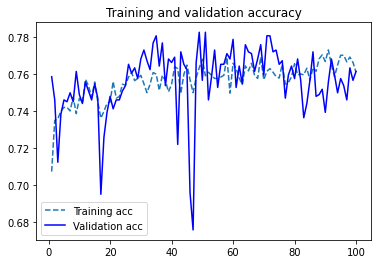

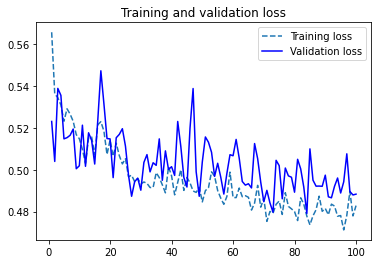

In [107]:
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '--', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, '--', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### 3. Fitting Best model and Prepare to Deploy

#### 3.1 Taking best model

In [22]:
model = RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=400)

#### 3.2 Fit

In [23]:
model.fit(X,y)

RandomForestClassifier(max_depth=90, max_features='sqrt', n_estimators=400)

#### 3.2 Saving model in to local machine

In [31]:
import pickle

# pickle_file = open('model_wine.pkl', 'ab')
# pickle.dump(model, pickle_file)                     
# pickle_file.close()

#### 3.2 Function to import a model and see if it's working

In [32]:
def predict_wine(tipo, fixed, volatile, citric, residual, chlorides, freesulfur, totalsulfur, density, ph, sulphates, alcohol):
    mapper = {0:"Bad Wine", 1:"Good Wine"}
    
    pickle_file = open('model_wine.pkl', 'rb')     
    model = pickle.load(pickle_file)
    y_predict = model.predict([[tipo, fixed, volatile, citric, residual, chlorides, freesulfur, totalsulfur, density, ph, sulphates, alcohol]])[0]
    return mapper[y_predict]


#### 3.3 Validating Function

In [33]:
predict_wine(0, 5.9, 0.645, 0.12, 2.0, 0.075, 32.0, 44.0, 0.99547, 3.57, 0.71, 10.2)

'Bad Wine'

### 4. App Widget

#### 4.1 Importing app widget from .py file

In [34]:
from wine_widget import model_api

#### 4.2 Running Widget

This app returns the output from an Flask API that was deployed on azure.

To verify the app, check python files in project folder.

The app was deployed in Feb 2022 on a free trial instance. Depending on when it runs, it may be offline

In [35]:
model_api()